In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance_matrix

In [2]:
def sammon_mapping(X, n_components=2, max_iter=300, tol=1e-5):
    n_samples, n_features = X.shape
    X = StandardScaler().fit_transform(X)  # Normalize the data
    d = np.sqrt(((X[:, None] - X) ** 2).sum(axis=2))
    d[np.arange(n_samples), np.arange(n_samples)] = 1e-10
    y = np.random.normal(0, 1, (n_samples, n_components))

    for it in range(max_iter):
        dist = np.sqrt(((y[:, None] - y) ** 2).sum(axis=2))
        np.fill_diagonal(dist, 1e-10)
        ratio = np.zeros_like(dist)
        mask = dist != 0
        ratio[mask] = d[mask] / dist[mask]
        scaling_factor = np.zeros_like(dist)
        scaling_factor[mask] = (ratio[mask] - 1) / dist[mask]
        scaling_factor[np.isnan(scaling_factor)] = 0
        gradient = np.zeros((n_samples, n_components))
        for i in range(n_samples):
            diff = y[i, np.newaxis] - y
            scaling_diff = scaling_factor[i][:, np.newaxis] * diff
            gradient[i] = (scaling_diff * diff).sum(axis=0)
        y_prev = y.copy()
        y -= 0.3 / (1 + it//50) * gradient

        if np.linalg.norm(y - y_prev) < tol:
            break

    return y[:, :n_components]

C:\Users\Felle\AppData\Local\Temp\ipykernel_17404\3407464613.py:9: RuntimeWarning: overflow encountered in square
  dist = np.sqrt(((y[:, None] - y) ** 2).sum(axis=2))
C:\Users\Felle\anaconda3\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\Felle\AppData\Local\Temp\ipykernel_17404\3407464613.py:9: RuntimeWarning: overflow encountered in square
  dist = np.sqrt(((y[:, None] - y) ** 2).sum(axis=2))
C:\Users\Felle\anaconda3\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\Felle\AppData\Local\Temp\ipykernel_17404\3407464613.py:9: RuntimeWarning: overflow encountered in square
  dist = np.sqrt(((y[:, None] - y) ** 2).sum(axis=2))
C:\Users\Felle\anaconda3\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(

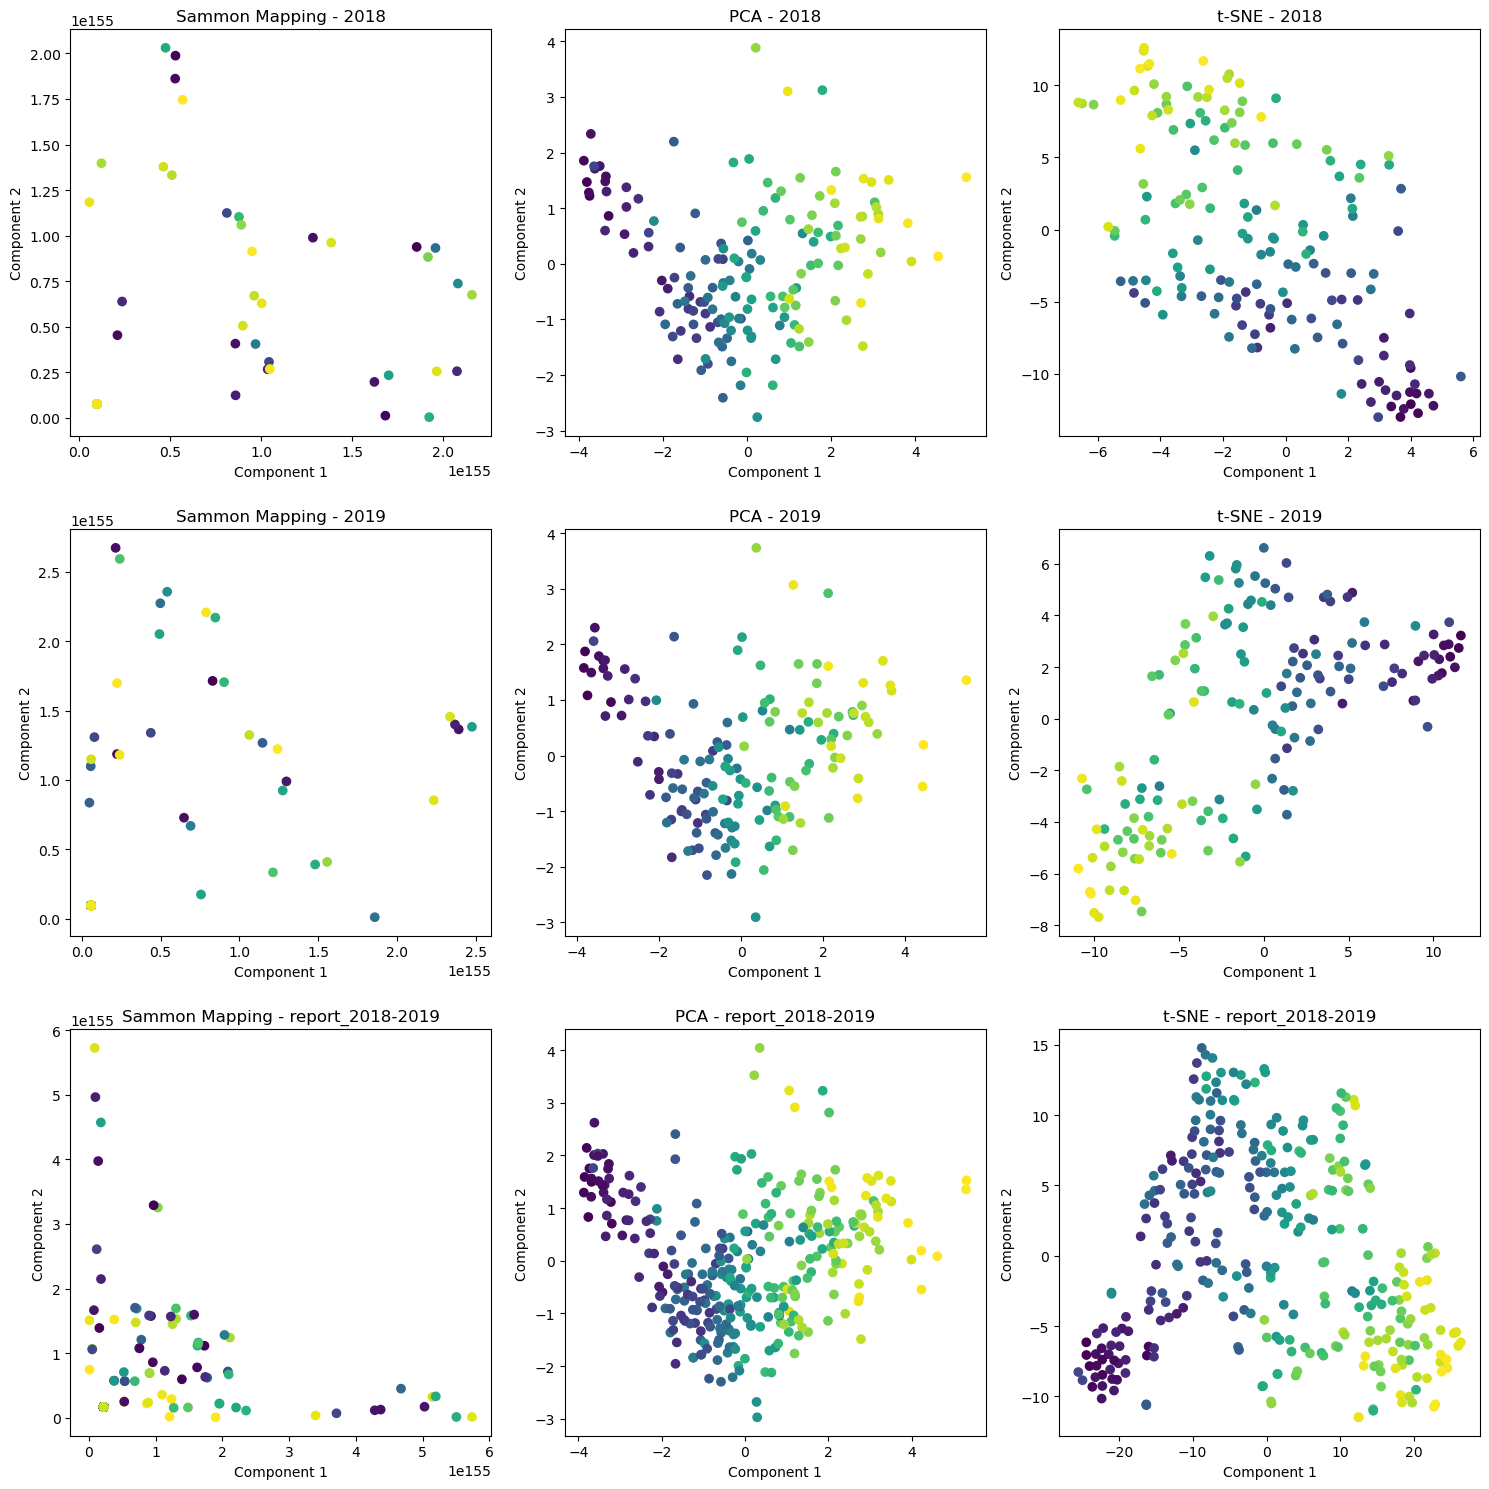

In [3]:
# Load the datasets
dataset_files = ['2018.csv', '2019.csv', 'report_2018-2019.csv']
datasets = []

for file in dataset_files:
    datasets.append(pd.read_csv(file))

# Perform dimensionality reduction and create scatterplot matrix
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

techniques = ['Sammon Mapping', 'PCA', 't-SNE']

for i, dataset in enumerate(datasets):
    # Select relevant columns for analysis
    selected_columns = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
    data = dataset[selected_columns]

    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)

    # Encode the target variable (Overall rank) for coloring
    target = dataset['Overall rank']

    # Apply dimensionality reduction techniques
    sammon = sammon_mapping(scaled_data)
    pca = PCA(n_components=2)
    tsne = TSNE(n_components=2)

    X_sammon = sammon
    X_pca = pca.fit_transform(scaled_data)
    X_tsne = tsne.fit_transform(scaled_data)

    # Create scatterplot for each technique
    scatterplots = [X_sammon, X_pca, X_tsne]

    # Label the plots with dataset names
    dataset_name = dataset_files[i].split('.')[0]
    for j, scatterplot in enumerate(scatterplots):
        ax = axes[i, j]
        ax.scatter(scatterplot[:, 0], scatterplot[:, 1], c=target)
        ax.set_xlabel('Component 1')
        ax.set_ylabel('Component 2')
        ax.set_title(techniques[j])
        ax.set_title(techniques[j] + ' - ' + dataset_name)

plt.tight_layout()
plt.show()